In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

mnist.target = mnist.target.astype(np.int8)

In [3]:
x = mnist.data / 255 # normalization
y = mnist.target

x = np.array(x)
y = np.array(y)

In [4]:
# split by train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0)

In [5]:
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

In [7]:
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=True)

In [8]:
# multi layer perceptron
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

In [9]:
# select loss function
criterion = nn.CrossEntropyLoss()

# select optimizer for updating the weight
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
nb_epoch = 25

In [11]:
def train(epoch):
    model.train() # set the module in training mode
    
    # train by taking out a mini batch one by one from the dataloader
    for data, targets in loader_train:
        optimizer.zero_grad() # initialize the gradient with 0 
        outputs = model(data) # input the data and compute output
        cost = criterion(outputs, targets) # compute the error of between output and correct answer of train data
        cost.backward() # backpropagation
        optimizer.step() # modify the weight
        
    print('epoch {}/{} Complete\n'.format(
        epoch + 1, nb_epoch
    ))

In [12]:
def test():
    model.eval() # set the module in evaluation mode
    correct = 0
    
    # inference by taking out a mini batch one by one from the dataloader
    with torch.no_grad(): # unnecessery to gradient calculation in process of inference
        for data, targets in loader_test: 
            outputs = model(data) # input the data and compute output
            
            # inference
            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()
            
    data_num = len(loader_test.dataset)
    print('\nPredictive Accuracy : {}/{} ({:.0f}%)\n'.format(
        correct, data_num, 100 * correct / data_num
        ))

In [13]:
for epoch in range(nb_epoch):
    train(epoch)
    
test()

epoch 1/25 Complete

epoch 2/25 Complete

epoch 3/25 Complete

epoch 4/25 Complete

epoch 5/25 Complete

epoch 6/25 Complete

epoch 7/25 Complete

epoch 8/25 Complete

epoch 9/25 Complete

epoch 10/25 Complete

epoch 11/25 Complete

epoch 12/25 Complete

epoch 13/25 Complete

epoch 14/25 Complete

epoch 15/25 Complete

epoch 16/25 Complete

epoch 17/25 Complete

epoch 18/25 Complete

epoch 19/25 Complete

epoch 20/25 Complete

epoch 21/25 Complete

epoch 22/25 Complete

epoch 23/25 Complete

epoch 24/25 Complete

epoch 25/25 Complete


Predictive Accuracy : 9731/10000 (97%)



Predicted Result : 9
The correct label is 9.


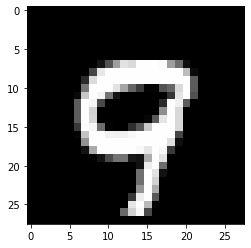

In [14]:
index = 111

model.eval()
data = x_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print('Predicted Result : {}'.format(predicted))

x_test_show = (x_test[index]).numpy()
plt.imshow(x_test_show.reshape(28, 28), cmap='gray')
print('The correct label is {:.0f}.'.format(y_test[index]))
plt.show()